In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [111]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [112]:
df.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [113]:
df.shape

(517, 13)

In [114]:
df.size

6721

In [115]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [116]:
df.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [117]:
corr_max=df.corr()
corr_max['area'].sort_values(ascending= False)

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [119]:
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                 (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),
               (1,2,3,4,5,6,7),inplace=True)

In [120]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [121]:
df.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,7.475822,4.259188,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,2.275990,2.072929,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,1.000000,1.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,7.000000,2.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,8.000000,5.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,9.000000,6.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,12.000000,7.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


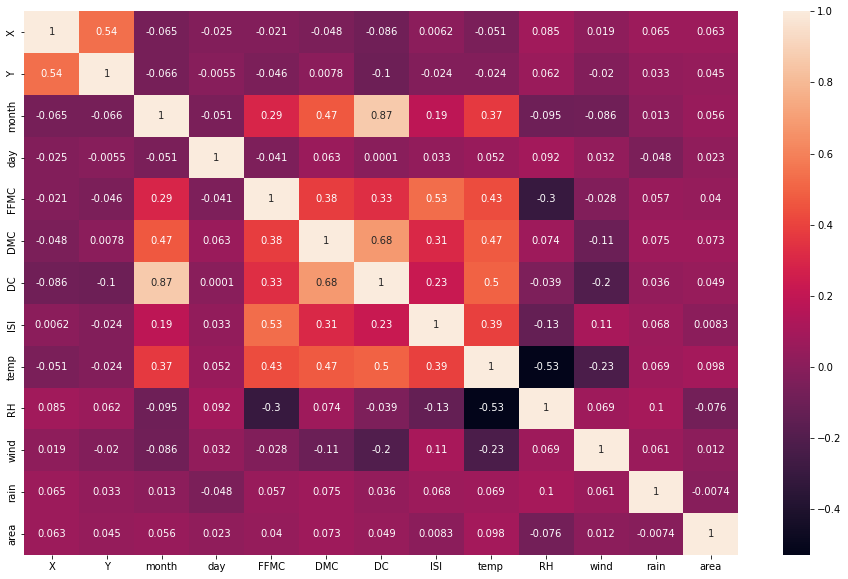

In [122]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

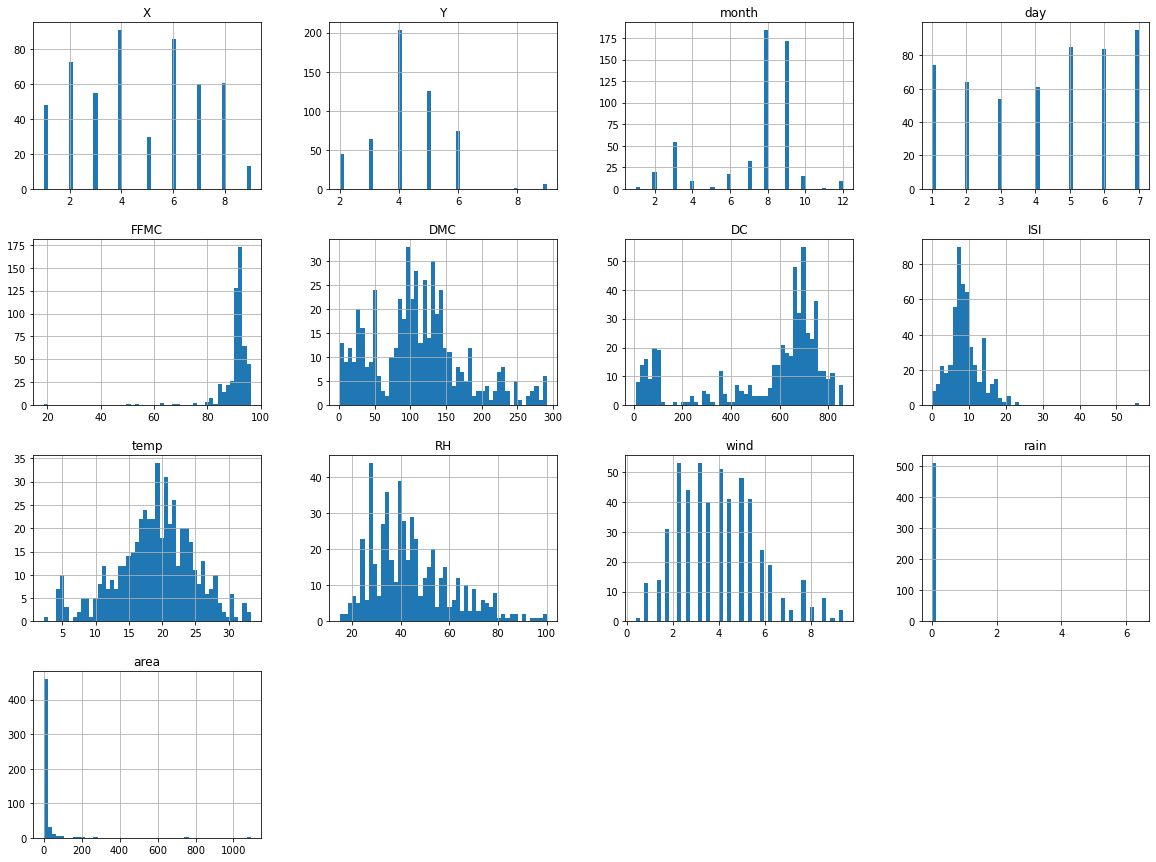

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

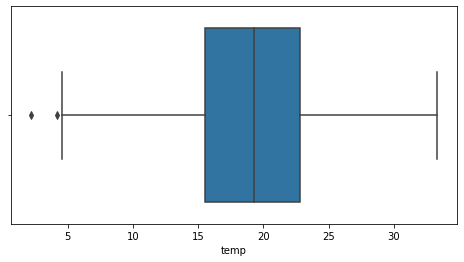

In [124]:
plt.figure(figsize =(8,4))
sns.boxplot(x = 'temp', data=df, orient='h');

In [125]:
from scipy import stats

R_q1 = df['temp'].quantile(q=0.25)
R_q3 = df['temp'].quantile(q=0.75)
print('1st quartile = {} \n3rd quartile range = {} \ninter quartile range = {} '.format(R_q1,R_q3,stats.iqr(df['temp'])))

1st quartile = 15.5 
3rd quartile range = 22.8 
inter quartile range = 7.300000000000001 


In [126]:
lower_outlier = R_q1-1.5*(R_q3-R_q1)
upper_outlier = R_q3+1.5*(R_q3-R_q1)

print('lower outlier = ',lower_outlier)
print('uppper outlier = ',upper_outlier)

lower outlier =  4.549999999999999
uppper outlier =  33.75


In [127]:
print('Number of upper outlier =  ',df[df['temp']>7]['temp'].count())
print('Number of lower outlier =  ',df[df['temp']<-1]['temp'].count())

Number of upper outlier =   495
Number of lower outlier =   0


In [128]:
for cols in df.columns[:-1]:
    Q1 = df[cols].quantile(q=0.25)
    Q3 = df[cols].quantile(q=0.75)
    iqr=Q3-Q1
    
    low = Q1-1.5*(Q3-Q1)
    high = Q3+1.5*(Q3-Q1)
    df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

## Linear Regression

In [129]:
X = df.drop(columns='area')
y= df['area']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [132]:
reg.score(X_train,y_train)

0.042834946719746636

In [133]:
reg.score(X_test, y_test)

0.0016618392857928876

In [134]:
# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions))
print ("r2 Score : ", r2_score(y_test, predictions))

Mean Squared Error :  11768.172754526277
r2 Score :  0.0016618392857928876


### Polynomial Regression

In [135]:
from sklearn.preprocessing import PolynomialFeatures

In [136]:
# Transforming data
poly = PolynomialFeatures(4)
poly_X_train = poly.fit_transform(X_train)
poly_X_test = poly.fit_transform(X_test)

model_2 = LinearRegression()
model_2.fit(poly_X_train, y_train)

# Predictions
predictions_poly = model_2.predict(poly_X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, predictions_poly))
print ("r2 Score : ", r2_score(y_test, predictions_poly))

Mean Squared Error :  234207.24102157727
r2 Score :  -18.868677245369234


### Ridge Regression

In [137]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [138]:
# Ridge Regression
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

# Predictions
pred = ridge_reg.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred))
print ("r2 Score : ", r2_score(y_test, pred))

Mean Squared Error :  11772.315340152
r2 Score :  0.0013104082352423108


In [139]:
ridge_reg.score(X_train, y_train)

0.04277067496358089

In [140]:
ridge_reg.score(X_test, y_test)

0.0013104082352423108

### Lasso Regression

In [141]:
# Lasso regression
lasso_reg = Lasso(alpha = 100, max_iter = 10000) 
lasso_reg.fit(X_train, y_train)

# Predictions
prediction = lasso_reg.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, prediction))
print ("r2 Score : ", r2_score(y_test, prediction))

Mean Squared Error :  11863.073903766666
r2 Score :  -0.006388980561823132


In [142]:
lasso_reg.score(X_train,y_train)

0.019715098346337223

In [143]:
lasso_reg.score(X_test,y_test)

-0.006388980561823132

### Elastic Net

In [144]:
# ElasticNet
model_5 = ElasticNet(alpha = 100, max_iter = 10000)
model_5.fit(X_train, y_train)

# Predictions
pred1 = model_5.predict(X_test)

# Scores
print ("Mean Squared Error : ", mean_squared_error(y_test, pred1))
print ("r2 Score : ", r2_score(y_test, pred1))

Mean Squared Error :  11878.55672414965
r2 Score :  -0.0077024461903654196


### Conclusion

#### As we can see there is no strong co-relation in between the features, soo the value of r^2 is negative in polynomial,elastic net and in lasso regression